<a href="https://colab.research.google.com/github/boyoung21/ESAA/blob/main/0404_%EB%B6%84%EB%A5%98_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류의 개요

분류: 지도학습의 대표적 유형
- 트리 및 신경망, 최소 근접, 로지스틱 회귀, SVM, 베이즈 통계 등의 머신러닝 알고리즘 구현할 때 쓰임


# 앙상블

결정 트리
- 앙상블의 기본 알고리즘
- 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합을 조심해서 쓴다면 쉽고 유연하게 적용될 수 있는 알고리즘. 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음.
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
- 규칙이 많으면, 즉 트리의 깊이가 깊어질수록 분류 결정 방식이 복잡해지며 과적합으로 이어지기 쉬우니 주의해야 함

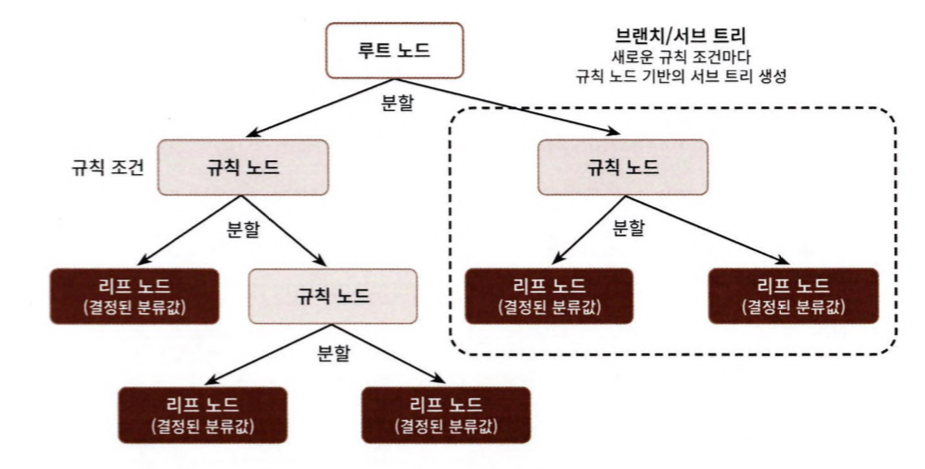

- 결정 노드는 정보 균일도가 더 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦. 데이터가 최대한 균일한 데이터 세트를 먼저 선택한다는 의미.
- 엔트로피를 이용한 information gain(정보 이득)지수와 지니 계수로 정보의 균일도를 측정

엔트로피: 주어진 데이터의 혼잡도
- 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음
- 정보 이득 지수 = 1-엔트로피 지수
- 결정 트리는 이 정보 이득 지수로 분할 기준을 정함
- 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석하여 지니 계수가 낮은 속성을 기준으로 분할함

결정 트리는 정보의 균일도를 기반으로 하기에 알고리즘이 쉽고 직관적이라는 장점이 있음.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.2, random_state=11)
# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

# Graphviz 패키지

Graphviz는 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지
- export_graphviz(Estimator, 피처의 이름 리스트, 레이블 이름 리스트)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity = True, filled = True)

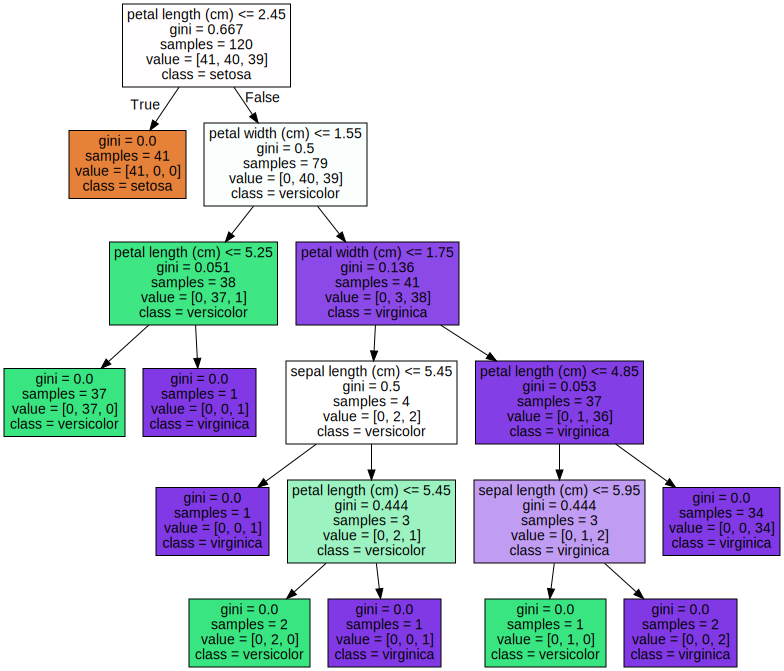

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

max_depth: 깊이 크기 제한

min_sample_split: 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수. 만약 이걸 4로 설정했는데 데이터 개수가 3개밖에 없으면 더 분할하지 않음.

min_sample_leaf: 분할될 경우 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수를 지정함. 만약 4라고 설정했을 경우, 오른쪽이나 왼쪽 둘 중 어느 쪽이라도 최소 데이터 건수 4보다 더 작은 샘플 데이터 건수를 갖게 된다면, 해당 노드는 더 이상 분할하지 않고 리프 노드가 됨. 이 값이 클수록 만족하기 어려워서 리프 노드가 될 가능성이 높아짐.

DecisionTreeClassifier 객체의 feature_importances
- 결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하는지가 중요한 요건이 됨. 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 게 크게 기여하며, 모델을 좀 더 간결하고 이상치에 강한 모델을 만들 수 있음.
- feature_importances는 각 피처들의 중요도를 알려 줌. 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<Axes: >

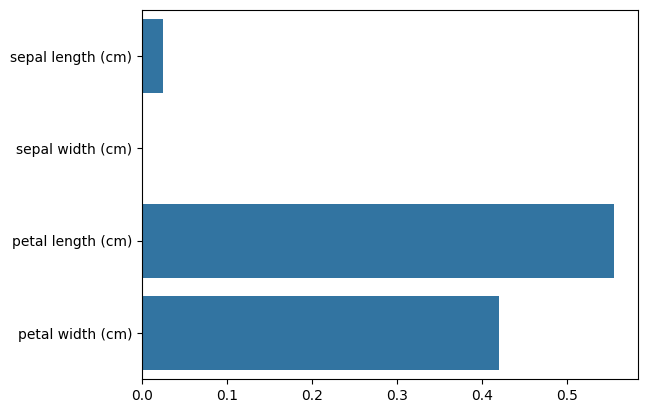

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feture importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name, value))


# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

make_classification()
- 사이킷런이 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 제공하는 함수
- 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트임

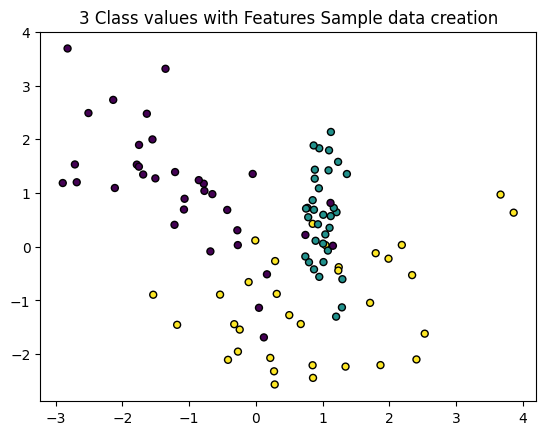

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features = 2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

visualize_boundary()
- 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해할 수 있게 해 주는 유틸리티 함수.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_boundary(classifier, X, y):
    # 1. 입력 데이터의 x, y 좌표 범위를 찾기
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 2. 그리드 생성
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # 3. 예측 결과 계산
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 4. 배경색 칠하기
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # 클래스별 색
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    # 5. 원래 데이터 점 찍기
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # 원 데이터 색
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=25, edgecolor='k', cmap=cmap_bold)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary Visualization")
    plt.show()

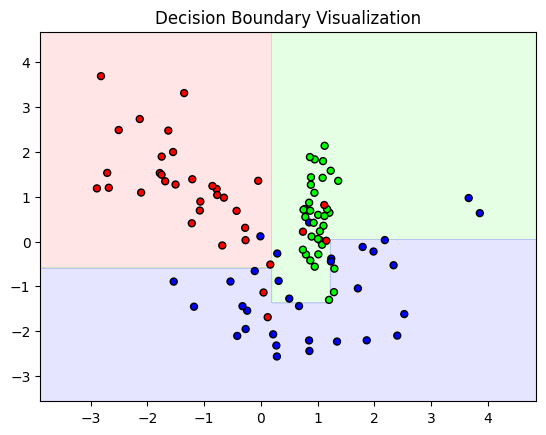

In [ ]:
# min_sample_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from io import IncrementalNewlineDecoder
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# feature.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/features.txt', sep='\s+',
                              header = None, names=['column_index', 'column_name'])
# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                              if x[1] >0 else x[0], axis=1)


  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('/content/features.txt', sep='\s+',
                                header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df( )를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name
  X_train = pd.read_csv('/content/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/y_train.txt', sep='\s+', names=['action'])
  y_test = pd.read_csv('/content/y_test.txt', sep='\s+', names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [24]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [30]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24],
    'min_samples_split': [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [31]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [32]:
max_depths = [ 6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정

for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [34]:
params = {
    'max_depth': [ 8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}


grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [35]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


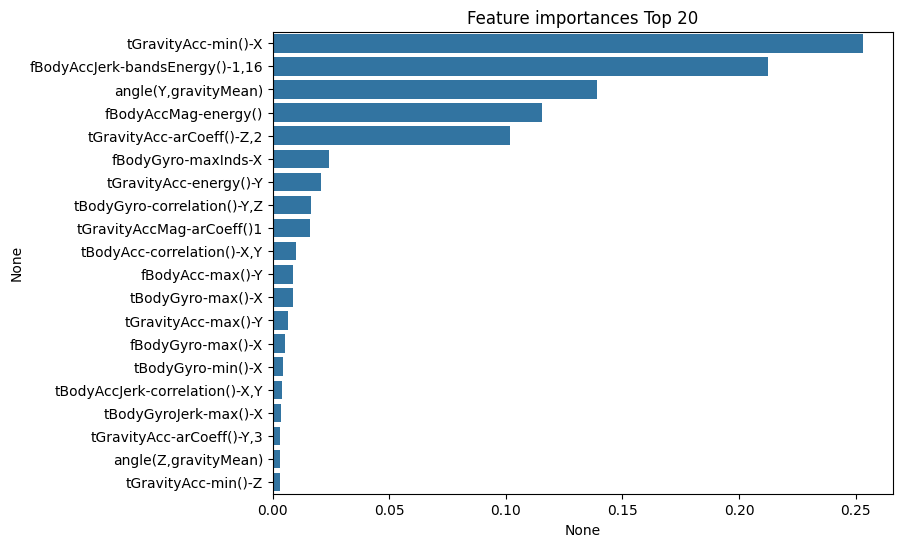

In [36]:
import seaborn as sns


ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()